In [7]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

/tmp/ipykernel_3589153/1972513220.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means_main = data_main.groupby("Model")["Performance"].mean().reset_index()
/tmp/ipykernel_3589153/1972513220.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means_ablate = data_ablate.groupby("Model")["Performance"].mean().reset_index()
/tmp/ipykernel_3589153/1972513220.py:71: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(
/tmp/ipykernel_3589153/1972513220.py:116: FutureWarning: 

Setting a gradien

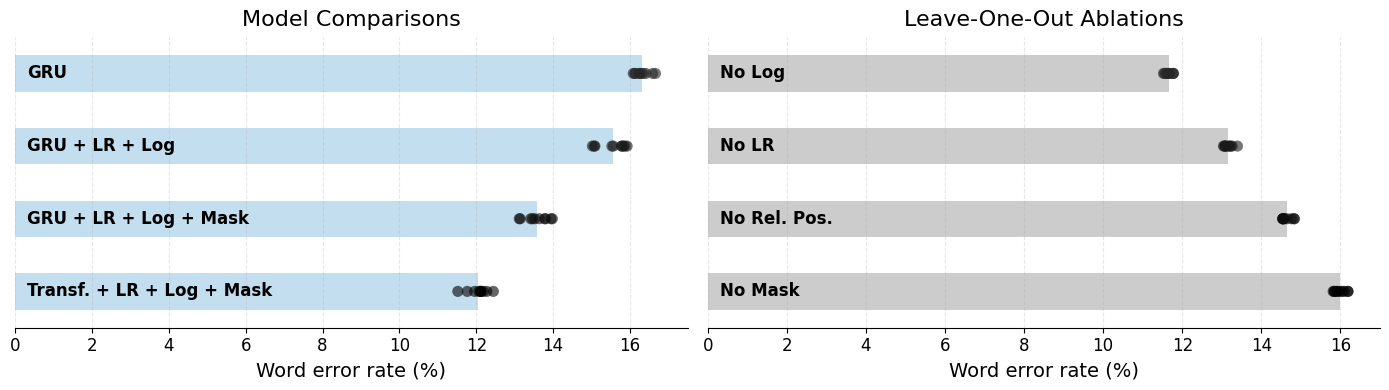

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

np.random.seed(0)

# -----------------------------
# Data for main models
# -----------------------------
model_perf_dict_main = {
    "GRU": np.random.uniform(15.7, 16.7, size=10),
    "GRU + LR + Log": np.random.uniform(15, 16, size=10),
    "GRU + LR + Log + Mask": np.random.uniform(13, 14, size=10),
    "Transf. + LR + Log + Mask": np.random.uniform(11.5, 12.5, size=10),
    
}
model_order_main = list(model_perf_dict_main.keys())

data_main = pd.DataFrame([
    {"Model": m, "Performance": p} for m, ps in model_perf_dict_main.items() for p in ps
])
data_main["Model"] = pd.Categorical(data_main["Model"], categories=model_order_main, ordered=True)
means_main = data_main.groupby("Model")["Performance"].mean().reset_index()

# -----------------------------
# Data for ablations
# -----------------------------
model_perf_dict_ablate = {
    "No Log": np.random.uniform(11.5, 11.9, size=10),
    "No LR": np.random.uniform(13.0, 13.4, size=10),
    "No Rel. Pos.": np.random.uniform(14.5, 14.9, size=10),
    "No Mask": np.random.uniform(15.8, 16.2, size=10),
}
model_order_ablate = list(model_perf_dict_ablate.keys())

data_ablate = pd.DataFrame([
    {"Model": m, "Performance": p} for m, ps in model_perf_dict_ablate.items() for p in ps
])
data_ablate["Model"] = pd.Categorical(data_ablate["Model"], categories=model_order_ablate, ordered=True)
means_ablate = data_ablate.groupby("Model")["Performance"].mean().reset_index()

# -----------------------------
# Plotting
# -----------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharex=False, sharey=False)
bar_color = "#6baed6"

# ---- Main models plot ----
for _, row in means_main.iterrows():
    axes[0].barh(
        y=row["Model"],
        width=row["Performance"],
        color=bar_color,
        alpha=0.4,
        height=0.5,
        zorder=0,
    )
    axes[0].text(
        0.3,
        row["Model"],
        row["Model"],
        va='center',
        ha='left',
        fontsize=12,
        color='black',
        weight='bold',
        zorder=3,
    )

sns.stripplot(
    data=data_main,
    y="Model",
    x="Performance",
    order=model_order_main,
    hue="Model",
    color='black',
    jitter=False,
    size=8,
    alpha=0.6,
    legend=False,
    zorder=2,
    ax=axes[0],
)

axes[0].set_title("Model Comparisons", fontsize=16, pad=8)
axes[0].set_xlabel("Word error rate (%)", fontsize=14)
axes[0].set_ylabel("")
axes[0].tick_params(labelsize=12)
axes[0].set_xlim(left=0)
axes[0].grid(axis="x", linestyle="--", alpha=0.3)
sns.despine(left=True, ax=axes[0])

# ---- Ablation plot ----
for _, row in means_ablate.iterrows():
    axes[1].barh(
        y=row["Model"],
        width=row["Performance"],
        color='gray',
        alpha=0.4,
        height=0.5,
        zorder=0,
    )
    axes[1].text(
        0.3,
        row["Model"],
        row["Model"],
        va='center',
        ha='left',
        fontsize=12,
        color='black',
        weight='bold',
        zorder=3,
    )

sns.stripplot(
    data=data_ablate,
    y="Model",
    x="Performance",
    order=model_order_ablate,
    hue="Model",
    color='black',
    jitter=False,
    size=8,
    alpha=0.6,
    legend=False,
    zorder=2,
    ax=axes[1],
)

axes[1].set_title("Leave-One-Out Ablations", fontsize=16, pad=8)
axes[1].set_xlabel("Word error rate (%)", fontsize=14)
axes[1].set_ylabel("")
axes[1].tick_params(labelsize=12)
axes[1].set_xlim(left=0)
axes[0].set_yticks([])
axes[1].set_yticks([])
axes[1].grid(axis="x", linestyle="--", alpha=0.3)
sns.despine(left=True, ax=axes[1])

plt.tight_layout()
plt.show()
